### Loading the data

In [1]:
import pandas as pd
data = pd.read_excel(r'C:\Users\lenovo\Desktop\ExcelR\Assingments\Data Science\18. Forecasting\CocaCola_Sales_Rawdata.xlsx')
data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


### Data Visualization

<AxesSubplot:>

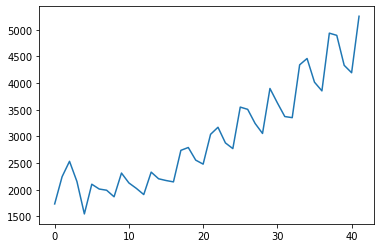

In [3]:
data.Sales.plot()

### Splitting data

In [5]:
Train = data.head(32)
Test = data.tail(10)

### Moving Average 

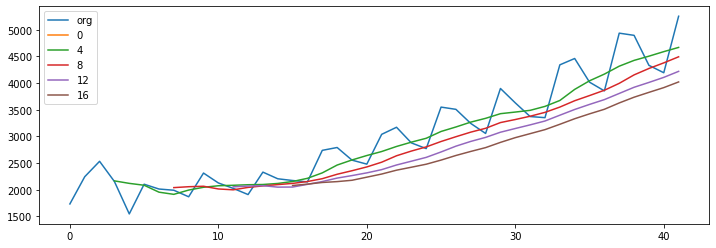

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
data.Sales.plot(label="org")
for i in range(0,20,4):
    data["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

### Time series decomposition plot 

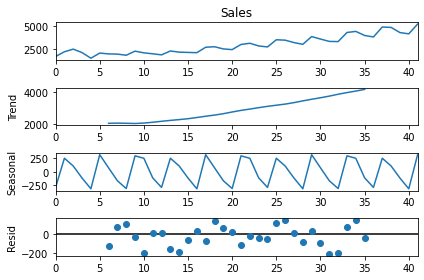

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(data.Sales,period=12)
decompose_ts_add.plot()
plt.show()

### ACF plots and PACF plots

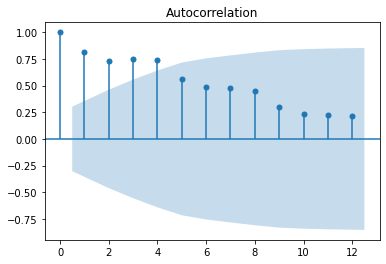

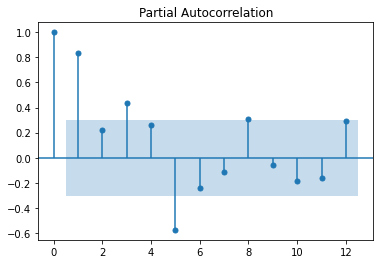

In [14]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Sales,lags=12)
tsa_plots.plot_pacf(data.Sales,lags=12)
plt.show()

### Evaluation Metric MAPE

In [ ]:
import numpy as np

def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method

In [16]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from warnings import filterwarnings
filterwarnings("ignore")

ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales) 

22.724050848585573

### Holt method

In [17]:
# Holt method 
from statsmodels.tsa.holtwinters import Holt

hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales)

16.72065094194317

### Holts winter exponential smoothing with additive seasonality and additive trend

In [18]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
#add the trend to the model
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() 
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)

10.46059193321841

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [19]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

8.017152667928892

### Final Model

In [20]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend

hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 

In [21]:
#Forecasting for next 10 time periods
hwe_model_mul_add.forecast(10)

32    3287.230631
33    4060.200842
34    4098.568773
35    3741.811370
36    3527.628672
37    4389.035216
38    4319.974651
39    4064.467067
40    3789.435854
41    4746.937160
dtype: float64